In [1]:
# Lo primero que hacemos es importar todas las librerias necesarias.
#importamos librerias para tratamiento de datos
import numpy as np
import pandas as pd
import re
import math as mat

#importamos librerias la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Abrimos el dataset y hacemos un chequeo rápido para saber cantidad de registros y miramos la composición del mismo.
filename = "../../dataset/properati.csv"
data = pd.read_csv(filename)

display(data.sample(n=6))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
90158,90158,sell,apartment,Santos Lugares,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Argentina,Bs.As. G.B.A. Zona Oeste,3428075.0,NaN,NaN,...,33.0,1589.743590,1878.787879,NaN,NaN,1600.0,http://www.properati.com.ar/1b9qe_venta_depart...,EXCELENTE!!! AL FRENTE CON BALCÓN VISTA LIBRED...,Departamento - Santos Lugares,https://thumbs4.properati.com/1/BrQ305JhCh-hdB...
104618,104618,sell,apartment,Villa Luzuriaga,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3427406.0,"-34.6382582,-58.5778693",-34.638258,...,53.0,1190.476190,1415.094340,NaN,NaN,NaN,http://www.properati.com.ar/1btis_venta_depart...,CODIGO: 494-260 ubicado en: AV. PTE. PERON 900...,SE VENDE DEPARTAMENTO 2 AMBIENTES EN VILLA LUZ...,https://thumbs4.properati.com/2/Lag7nna_H58Ezm...
56454,56454,sell,house,Salta,|Argentina|Salta|Salta|,Argentina,Salta,3838233.0,"-24.788351,-65.42588",-24.788351,...,NaN,NaN,NaN,NaN,5.0,NaN,http://www.properati.com.ar/19r3j_venta_casa_s...,Corredor Responsable: Pablo Castañeda - C.U.C....,Casa a la Venta Macrocentro Maipu 100,https://thumbs4.properati.com/7/YAWeUZWlKdDuQX...
116587,116587,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,NaN,NaN,...,71.0,2865.853659,3309.859155,NaN,NaN,NaN,http://www.properati.com.ar/1ccik_venta_depart...,EMPRENDIMIENTO EN POZO. ENTREGA DICIEMBRE 201...,Gran 3 ambientes con 2 baños al frente en cons...,https://thumbs4.properati.com/7/VEOOLkcjK4jAch...
39811,39811,sell,apartment,Muñiz,|Argentina|Bs.As. G.B.A. Zona Norte|San Miguel...,Argentina,Bs.As. G.B.A. Zona Norte,3430513.0,"-34.5542751,-58.710272",-34.554275,...,42.0,1476.190476,1476.190476,NaN,NaN,NaN,http://www.properati.com.ar/18pem_venta_depart...,DEPARTAMENTO DOS AMBIENTES A LA VENTA EN MUÑIZ...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/9/tLoor4_jfqGHZ4...
42427,42427,sell,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,3429760.0,"-34.6185289,-58.361047",-34.618529,...,64.0,NaN,NaN,NaN,2.0,NaN,http://www.properati.com.ar/18wfy_venta_depart...,"Departamento de 2 ambientes en Zencity, domito...",Venta Zencity 2 ambientes Puerto Madero,https://thumbs4.properati.com/0/wLkYOm4gDnvFja...


(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


In [3]:
print (data.isna().sum()/data.shape[0]*100)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [4]:
# Columna surface_total_in_m2: revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.surface_total_in_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.surface_total_in_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['surface_total_in_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 39328
Porcentaje de registros con NaN: 32.44349117307375
Contamos cantidad de registros unicos:
      surface_total_in_m2  count
0                     0.0    383
1                    10.0     21
2                    11.0      8
3                    12.0     12
4                    13.0      6
...                   ...    ...
1682             100350.0      1
1683             107000.0      4
1684             110000.0      3
1685             154438.0      1
1686             200000.0      2

[1687 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

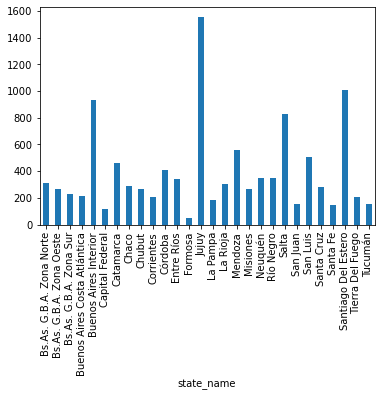

In [5]:
#graficamos el dato por tipo de propiedad con el fin de observar los rangos de areas de superficie total que incluye areas adicionales a la superficie cubierta.
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado.
data.groupby('state_name')['surface_total_in_m2'].mean().plot.bar()

# Detalle de análisis de columnas:
* `surface_total_in_m2 ` -> Esta columna tiene 39.328 datos nulos o su equivalente 32,44%. El precio se calcula sobre la superficie total asi que debemos revisar la relevancia de esta variable.

In [6]:
data.surface_total_in_m2.describe()

count     81892.000000
mean        233.795328
std        1782.222147
min           0.000000
25%          50.000000
50%          84.000000
75%         200.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

### Detalle de valores extremos en la  columna `surface_total_in_m2`:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar como en apartamentos se evidencias valores muy por encima de los valores medios, en el caso de las casas se observan algunas propiedades alejadas de la media.

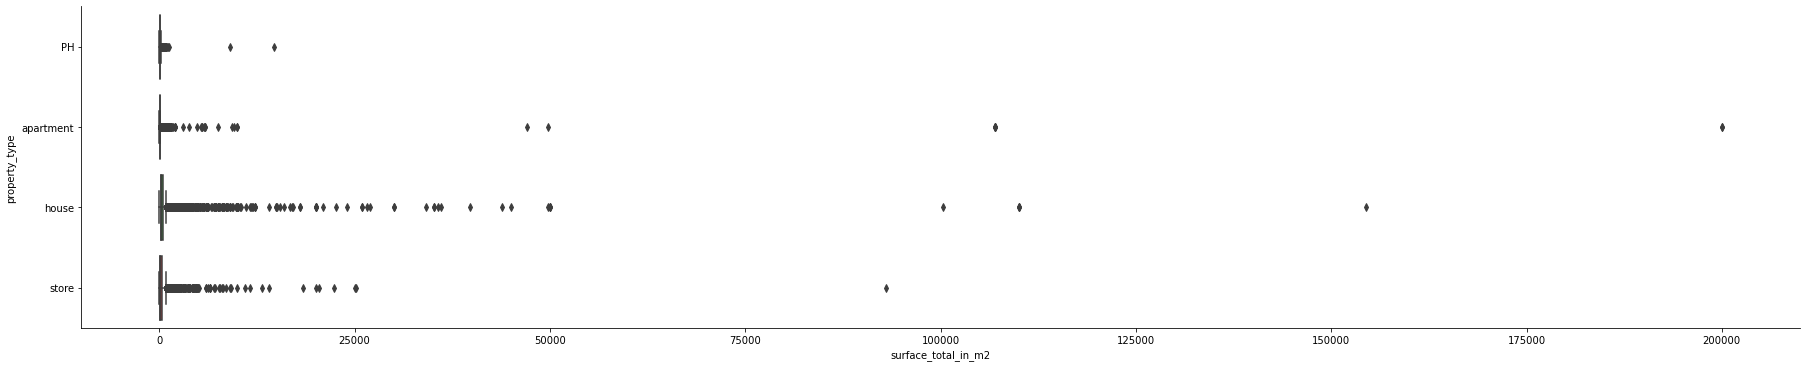

In [7]:
sns.catplot(data=data, x= 'surface_total_in_m2', y="property_type", kind="box", height=5, aspect=5,)


### Regex para rellenar la columna `surface_total_in_m2`:

Vamos a extraer datos de las columnas title y description para extraer esta información, para ello utilizaremos las expresiones de numeros que vengan acompañados del texto m2, M2, metros2, Metros2, mts2 y Mts2

In [8]:
# Buscamos superficie total en metros cuadrado en los titulos y en la descripción con Mts2

#el area más pequeña es de 0 m2 hay 383 registos en ceros, trae a la base m2, debemos eliminarlos y transformar . a , ???

data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'([0-9]*\.?\,?[0-9]*)\s?[m|M|mts|Mts|metros|Metros|METROS]\.?\S*2'
    
regex = re.compile(patron, flags = re.IGNORECASE)

superficie_total_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_total_in_m2'].fillna(superficie_total_titulo, inplace=True)

superficie_total_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_total_in_m2'].fillna(superficie_total_descripcion, inplace=True)

print (data.isna().sum()/data.shape[0]*100)
print (f'entradas: {data.shape[0]}')

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           23.528296
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.000000
title                          0.000000


In [9]:
data.surface_total_in_m2.sample(50)

22729       112
75293       NaN
84598       115
38373        42
56381       NaN
17684       333
73018       105
6564           
46896       300
85264       NaN
72536        28
86433       100
72060        50
12051       625
93670       133
13226       NaN
45123       NaN
120813       70
56564        52
96995        34
75326       478
13412       NaN
15733        65
108644      NaN
53686       NaN
84277        53
104285       65
60509       150
56532       325
103895       86
35764        70
35747        42
62085        33
28949       NaN
108930       62
68526      1000
79818       260
94712        55
81165        45
96376       160
79941       163
48658       600
116368      NaN
110104       47
71662       483
40283       NaN
108264      NaN
46178        75
103181         
36223     1.000
Name: surface_total_in_m2, dtype: object